LR Train
                0
R^2      0.722096
MSE   8155.233780
MAPE     0.267137
LR Test
                 0
R^2  -8.572730e+21
MSE   2.739503e+26
MAPE  2.014343e+08
R-squared (train): 0.7220964295306772
R-squared (test): -8.572730419873188e+21
Mean of residuals (train): 0.028011529477515326
Mean of residuals (test): 175517049624.05157


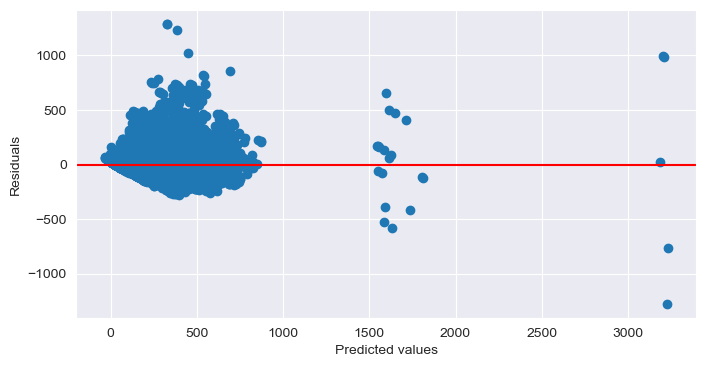

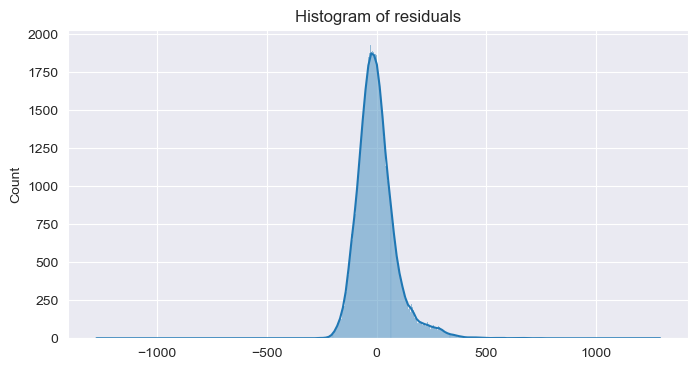

Shapiro-Wilk test p-value: 0.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from MY_Models import Regression_models

L1 or L2 regularization can shrink the weights or coefficients towards zero, which can result in the model being biased towards predicting values closer to the mean of the target variable. In a skewed data distribution, this can be problematic, as the mean may not be representative of the actual data distribution.

However, L1 or L2 regularization can still be useful for preventing overfitting and improving the model's generalization performance.

 it is reasonable to use a combination of XGBoost and a neural network model like WaveNet to improve the prediction accuracy for a regression problem. This approach is known as "stacking" or "ensemble learning", where multiple models are trained and their predictions are combined to produce a final output.

Here are a few published articles that demonstrate the effectiveness of this approach:

"Ensemble of deep neural networks using stacked generalization for prediction of protein-protein interactions" (https://www.sciencedirect.com/science/article/pii/S0968089619314873) - In this study, the authors used a stacked ensemble of deep neural networks to predict protein-protein interactions. They first trained multiple neural network models using different architectures and hyperparameters. Then, they used a meta-model to combine the predictions from these models and improve the accuracy of the final predictions.
"A Deep Learning-Based Multi-Task Ensemble Model for Cancer Prognosis Prediction" (https://www.mdpi.com/2072-6694/12/11/3446) - In this study, the authors used a combination of XGBoost and a neural network model to predict the prognosis of cancer patients. They first trained an XGBoost model to predict the survival rate of patients. Then, they trained a neural network model to predict the residual errors of the XGBoost model. Finally, they combined the predictions from both models to improve the accuracy of the final predictions.
"A hybrid ensemble learning approach for forecasting residential electricity demand" (https://www.sciencedirect.com/science/article/pii/S0142061519300545) - In this study, the authors used a hybrid ensemble learning approach to predict the electricity demand of residential buildings. They first trained multiple XGBoost models using different subsets of features. Then, they combined the predictions from these models using a neural network model and improved the accuracy of the final predictions.

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df = train_df.drop('baseFare', axis=1)
test_df = test_df.drop('baseFare', axis=1)
y_train = train_df[['totalFare']]
x_train = train_df.drop('totalFare', axis=1)
y_test = test_df[['totalFare']]
x_test = test_df.drop('totalFare', axis=1)

In [3]:
Reg_models = Regression_models(x_train, y_train, x_test, y_test, standardlise=True)

## XGBoost Models

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ............alpha=0.2, max_depth=6, n_estimators=50; total time=   2.3s
[CV] END ............alpha=0.2, max_depth=6, n_estimators=50; total time=   2.2s
[CV] END ............alpha=0.2, max_depth=6, n_estimators=50; total time=   2.2s
[CV] END ............alpha=0.2, max_depth=6, n_estimators=50; total time=   2.2s
[CV] END ............alpha=0.2, max_depth=6, n_estimators=50; total time=   2.2s
[CV] END ...........alpha=0.2, max_depth=6, n_estimators=100; total time=   4.0s
[CV] END ...........alpha=0.2, max_depth=6, n_estimators=100; total time=   4.2s
[CV] END ...........alpha=0.2, max_depth=6, n_estimators=100; total time=   4.4s
[CV] END ...........alpha=0.2, max_depth=6, n_estimators=100; total time=   4.0s
[CV] END ...........alpha=0.2, max_depth=6, n_estimators=100; total time=   4.1s
[CV] END ...........alpha=0.2, max_depth=6, n_estimators=150; total time=   6.1s
[CV] END ...........alpha=0.2, max_depth=6, n_e

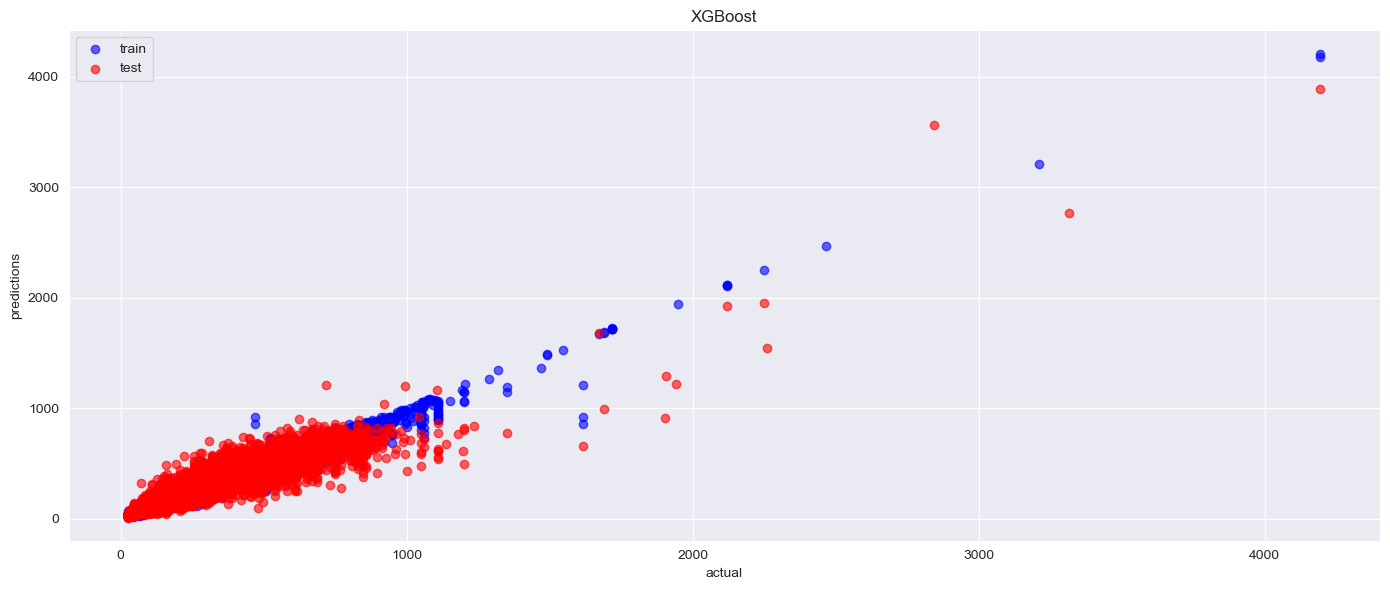

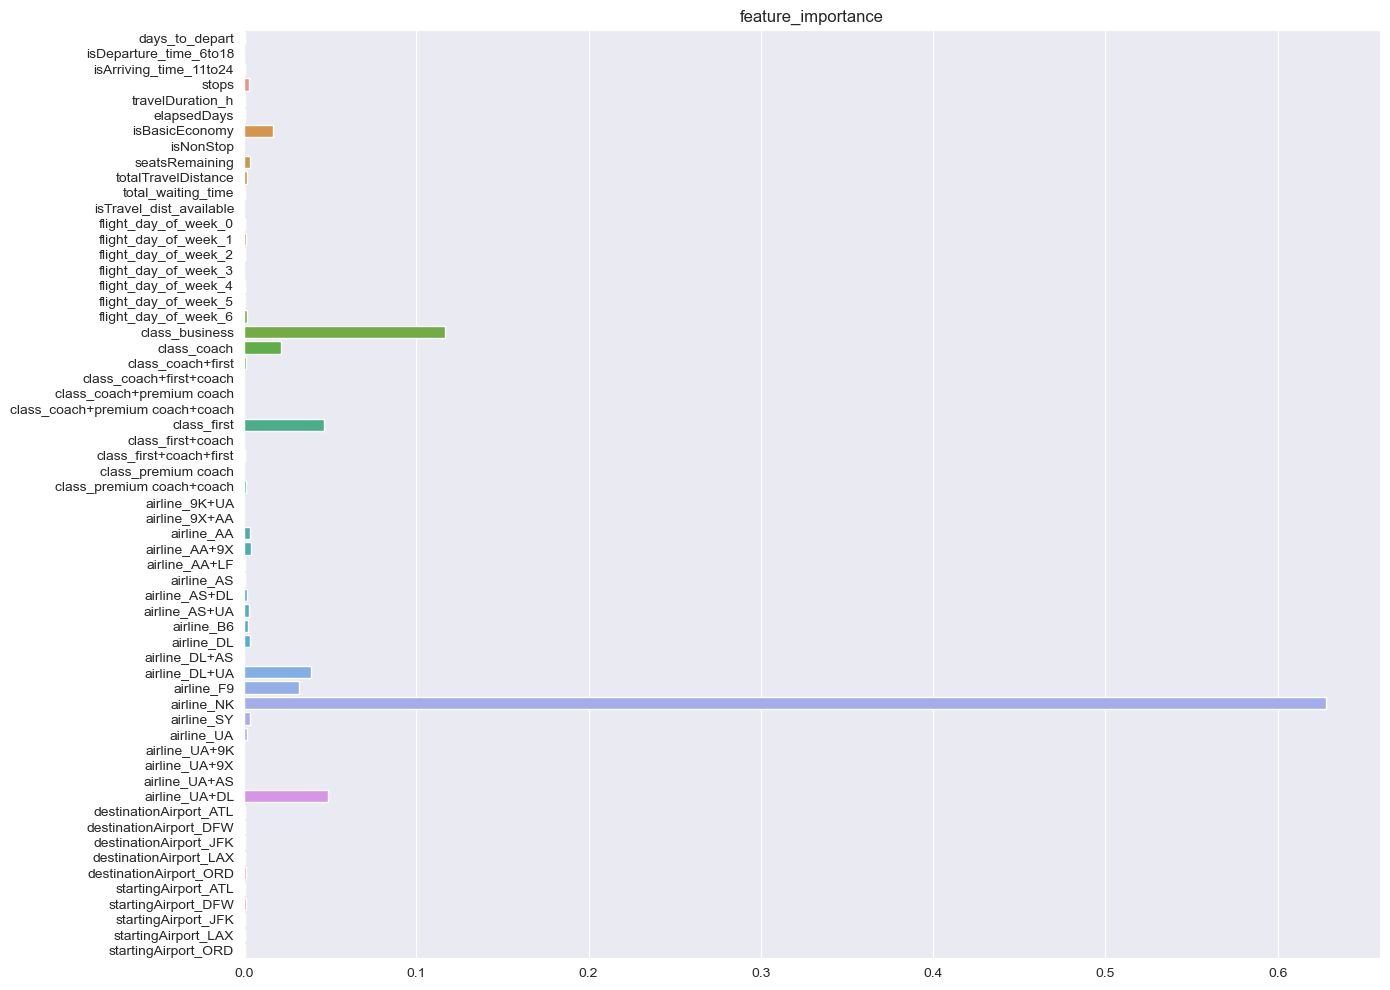

In [7]:
xgb_model = Reg_models.XGBR(searchCV=True, best_depth_input=10, best_Nestimators=200,
best_L1_alpha=1, show_avsp=True, show_features_imp=True)

* Fitting 5 folds for each of 64 candidates, totalling 320 fits, around total 3200s
* Outputs:
XGBoost Best parameters:  {'alpha': 0.2, 'max_depth': 10, 'n_estimators': 150}

In [8]:
xgb_features_imp_df = pd.DataFrame(data={'features': np.array(Reg_models.features_names_list),
                                         'importance': xgb_model.feature_importances_}).sort_values('importance',
                                                                                                    ascending=False)
xgb_features_imp_df

,features,importance
43,airline_NK,0.628017
19,class_business,0.116601
49,airline_UA+DL,0.048539
25,class_first,0.046244
41,airline_DL+UA,0.039132
42,airline_F9,0.032033
20,class_coach,0.021231
6,isBasicEconomy,0.016932
33,airline_AA+9X,0.004275
8,seatsRemaining,0.003742


In [10]:
xgb_model_no_L1 = Reg_models.XGBR(searchCV=False, best_depth_input=10, best_Nestimators=150,best_L1_alpha=0, show_avsp=False, show_features_imp=False)

XGBoost Best parameters:  {'n_estimators': 150, 'max_depth': 10, 'alpha': 0}
XGBR train R_sq:  0.9726221066303179
XGBR train MSE:  803.419403531665
XGBR test R_sq:  0.8698832513765595
XGBR test MSE:  4158.013423350423


#### Drop non-important features?

We shall also reconsider the features engineering based on the importance of XGBoost and EDA

## Neural Networks

In [11]:
seq_NN_rmse = Reg_models.NN_sequential(epoch_num=100, loss_func='rmse')

2023-04-20 18:26:19.373046: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-20 18:26:19.377341: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 18:26:19.520553: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
237/237 [==============================] - 2s 5ms/step - loss: 190.0335 - r_squared: -0.5521
Epoch 2/100
237/237 [==============================] - 1s 5ms/step - loss: 86.8335 - r_squared: 0.7663
Epoch 3/100
237/237 [==============================] - 1s 5ms/step - loss: 86.0959 - r_squared: 0.7721
Epoch 4/100
237/237 [==============================] - 1s 5ms/step - loss: 84.3452 - r_squared: 0.7802
Epoch 5/100
237/237 [==============================] - 1s 5ms/step - loss: 82.5897 - r_squared: 0.7829
Epoch 6/100
237/237 [==============================] - 1s 5ms/step - loss: 81.2839 - r_squared: 0.7882
Epoch 7/100
237/237 [==============================] - 1s 5ms/step - loss: 81.8164 - r_squared: 0.7869
Epoch 8/100
237/237 [==============================] - 1s 5ms/step - loss: 80.7223 - r_squared: 0.7907
Epoch 9/100
237/237 [==============================] - 1s 5ms/step - loss: 80.2347 - r_squared: 0.7933
Epoch 10/100
237/237 [==============================] - 1s 5ms/step - l

In [13]:
seq_NN_with_Bmse = Reg_models.NN_sequential(epoch_num=100, loss_func='bmc', bmc_noise_var=220)

Epoch 1/100
237/237 [==============================] - 2s 6ms/step - loss: 44156.6740 - r_squared: -0.5962
Epoch 2/100
237/237 [==============================] - 2s 6ms/step - loss: 8158.3250 - r_squared: 0.7565
Epoch 3/100
237/237 [==============================] - 1s 6ms/step - loss: 7722.0630 - r_squared: 0.7708
Epoch 4/100
237/237 [==============================] - 1s 6ms/step - loss: 7496.2988 - r_squared: 0.7778
Epoch 5/100
237/237 [==============================] - 2s 6ms/step - loss: 7377.6022 - r_squared: 0.7671
Epoch 6/100
237/237 [==============================] - 1s 6ms/step - loss: 7345.0813 - r_squared: 0.7803
Epoch 7/100
237/237 [==============================] - 1s 6ms/step - loss: 6996.4818 - r_squared: 0.7882
Epoch 8/100
237/237 [==============================] - 1s 6ms/step - loss: 6922.1063 - r_squared: 0.8023
Epoch 9/100
237/237 [==============================] - 1s 6ms/step - loss: 6747.1110 - r_squared: 0.8026
Epoch 10/100
237/237 [==============================]

In [4]:
seq_NN_with_mape = Reg_models.NN_sequential(epoch_num=100, loss_func='mape')

2023-04-24 16:26:20.458604: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-24 16:26:20.460723: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 16:26:20.541024: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
237/237 [==============================] - 2s 5ms/step - loss: 54.9237 - r_squared: -0.6819
Epoch 2/100
237/237 [==============================] - 1s 5ms/step - loss: 22.2458 - r_squared: 0.7141
Epoch 3/100
237/237 [==============================] - 1s 5ms/step - loss: 20.7115 - r_squared: 0.7247
Epoch 4/100
237/237 [==============================] - 1s 6ms/step - loss: 19.9113 - r_squared: 0.7309
Epoch 5/100
237/237 [==============================] - 1s 5ms/step - loss: 19.4192 - r_squared: 0.7336
Epoch 6/100
237/237 [==============================] - 1s 5ms/step - loss: 19.0460 - r_squared: 0.7360
Epoch 7/100
237/237 [==============================] - 1s 5ms/step - loss: 18.7952 - r_squared: 0.7360
Epoch 8/100
237/237 [==============================] - 1s 5ms/step - loss: 18.5366 - r_squared: 0.7421
Epoch 9/100
237/237 [==============================] - 1s 5ms/step - loss: 18.4896 - r_squared: 0.7407
Epoch 10/100
237/237 [==============================] - 1s 5ms/step - lo

MAPE is a commonly used loss function in machine learning models, including neural networks. It measures the average percentage difference between the predicted and actual values. However, MAPE can be problematic because it can produce large errors when the actual values are close to zero, which can lead to negative R^2 values.

Negative R^2 values can occur when the model's predictions are worse than simply using the mean of the actual values. In other words, the model is not fitting the data well, and the predictions are worse than chance. This can be a sign that the model is not appropriate for the data, or that the data has high variability or outliers that are affecting the model's performance.

In [15]:
seq_NN_with_huber = Reg_models.NN_sequential(epoch_num=100, loss_func='huber',huber_delta=1)

Epoch 1/100
237/237 [==============================] - 2s 5ms/step - loss: 157.2501 - r_squared: -0.7061
Epoch 2/100
237/237 [==============================] - 1s 5ms/step - loss: 59.8943 - r_squared: 0.7285
Epoch 3/100
237/237 [==============================] - 1s 5ms/step - loss: 57.4809 - r_squared: 0.7572
Epoch 4/100
237/237 [==============================] - 1s 5ms/step - loss: 55.9676 - r_squared: 0.7672
Epoch 5/100
237/237 [==============================] - 1s 5ms/step - loss: 55.0987 - r_squared: 0.7710
Epoch 6/100
237/237 [==============================] - 1s 5ms/step - loss: 54.1432 - r_squared: 0.7744
Epoch 7/100
237/237 [==============================] - 1s 5ms/step - loss: 53.7931 - r_squared: 0.7775
Epoch 8/100
237/237 [==============================] - 1s 5ms/step - loss: 53.3024 - r_squared: 0.7813
Epoch 9/100
237/237 [==============================] - 1s 5ms/step - loss: 52.7025 - r_squared: 0.7846
Epoch 10/100
237/237 [==============================] - 1s 5ms/step - l

## Autoencoder with XGBoost

In [16]:
Reg_models.autoencoder_with_xgboost(best_parameters_normal={'n_estimators': 200, 'max_depth': 8,
                                                            'alpha': 1},
                                    best_parameters_abnormal={'n_estimators': 50, 'max_depth': 4,
                                                              'alpha': 2}, searchCV_ab=True)


Epoch 1/50
2206/2206 [==============================] - 1s 556us/step - loss: 0.6453
Epoch 2/50
2206/2206 [==============================] - 1s 551us/step - loss: 0.4049
Epoch 3/50
2206/2206 [==============================] - 1s 554us/step - loss: 0.3729
Epoch 4/50
2206/2206 [==============================] - 1s 551us/step - loss: 0.3779
Epoch 5/50
2206/2206 [==============================] - 1s 549us/step - loss: 0.3644
Epoch 6/50
2206/2206 [==============================] - 1s 547us/step - loss: 0.3672
Epoch 7/50
2206/2206 [==============================] - 1s 543us/step - loss: 0.3555
Epoch 8/50
2206/2206 [==============================] - 1s 552us/step - loss: 0.3304
Epoch 9/50
2206/2206 [==============================] - 1s 553us/step - loss: 0.3241
Epoch 10/50
2206/2206 [==============================] - 1s 552us/step - loss: 0.3293
Epoch 11/50
2206/2206 [==============================] - 1s 549us/step - loss: 0.3245
Epoch 12/50
2206/2206 [==============================] - 1s 545

## XGBoost with NN

In [17]:
Reg_models.XGBoost_with_NN(searchCV=False, best_depth_input=10, best_Nestimators=150, best_L1_alpha=0.2,
show_avsp=False, show_features_imp=False, epochs=100)

XGBoost Best parameters:  {'n_estimators': 150, 'max_depth': 10, 'alpha': 0.2}
XGBR train R_sq:  0.9706137689548603
XGBR train MSE:  862.3551819540154
XGBR test R_sq:  0.870464138753656
XGBR test MSE:  4139.450574701229
Epoch 1/100
237/237 - 1s - loss: 3.6068
Epoch 2/100
237/237 - 1s - loss: 2.2831
Epoch 3/100
237/237 - 0s - loss: 2.2022
Epoch 4/100
237/237 - 0s - loss: 2.1903
Epoch 5/100
237/237 - 1s - loss: 2.1881
Epoch 6/100
237/237 - 1s - loss: 2.1855
Epoch 7/100
237/237 - 1s - loss: 2.1859
Epoch 8/100
237/237 - 1s - loss: 2.1851
Epoch 9/100
237/237 - 0s - loss: 2.1849
Epoch 10/100
237/237 - 0s - loss: 2.1836
Epoch 11/100
237/237 - 1s - loss: 2.1836
Epoch 12/100
237/237 - 1s - loss: 2.1844
Epoch 13/100
237/237 - 0s - loss: 2.1836
Epoch 14/100
237/237 - 0s - loss: 2.1830
Epoch 15/100
237/237 - 0s - loss: 2.1845
Epoch 16/100
237/237 - 0s - loss: 2.1824
Epoch 17/100
237/237 - 0s - loss: 2.1823
Epoch 18/100
237/237 - 0s - loss: 2.1823
Epoch 19/100
237/237 - 0s - loss: 2.1838
Epoch 20/1